# Image Enhancement
Tổng quan: Ở bài tập này, chúng ta sẽ thực hành lập trình một số hàm biến đổi ảnh cơ bản
Yêu cầu thư viện: OpenCV, matplotlib 

### Kết nối tới Google drive trong trường hợp chạy trên colab, bỏ qua bước này nếu chạy local

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/'My Drive'/Code/ImagesProcessing

/content/drive/My Drive/Code/ImagesProcessing


### Khai báo các thư viện 

In [ ]:
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm

import cv2
import numpy as np
print(cv2.__version__)

4.1.2


Tạo ảnh ngược của 1 ảnh

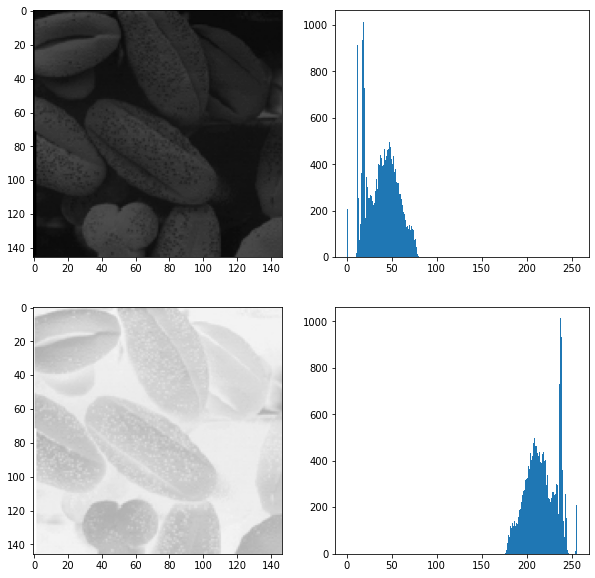

In [ ]:
img = cv2.imread('images/D24_01.jpg', cv2.IMREAD_UNCHANGED)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(img1, cmap='gray',norm=NoNorm())
plt.subplot(222)
plt.hist(img1.ravel(),256,[0,256])
 
# Create zeros array to store the stretched image
new_img = np.zeros((img1.shape[0],img1.shape[1]),dtype = 'uint8')
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        new_img[i,j]=255-img1[i,j]            
plt.subplot(223)
plt.imshow(new_img, cmap='gray',norm=NoNorm())
plt.subplot(224)
plt.hist(new_img.ravel(),256,[0,256])
plt.show()

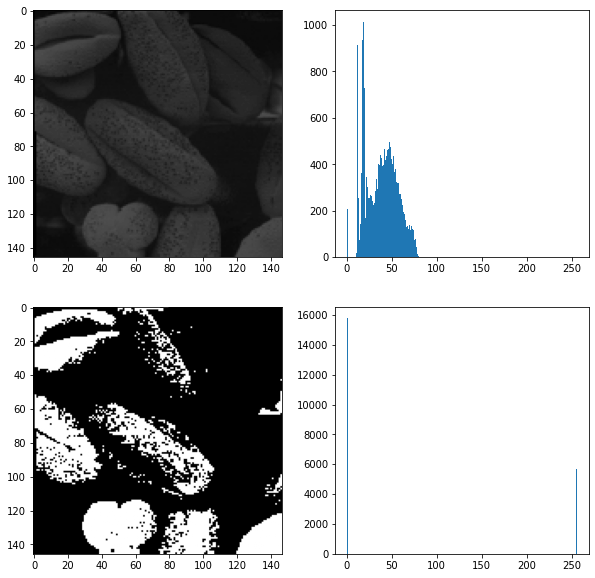

In [ ]:
img = cv2.imread('images/D24_01.jpg', cv2.IMREAD_UNCHANGED)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(img1, cmap='gray',norm=NoNorm())
plt.subplot(222)
plt.hist(img1.ravel(),256,[0,256])

new_img = np.zeros((img1.shape[0],img1.shape[1]),dtype = 'uint8')
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        if img1[i][j] <= 50 or img1[i][j] >= 150:
          new_img[i][j] = 0
        else:
          new_img[i][j] = 255
plt.subplot(223)
plt.imshow(new_img, cmap='gray',norm=NoNorm())
plt.subplot(224)
plt.hist(new_img.ravel(),256,[0,256])
plt.show()

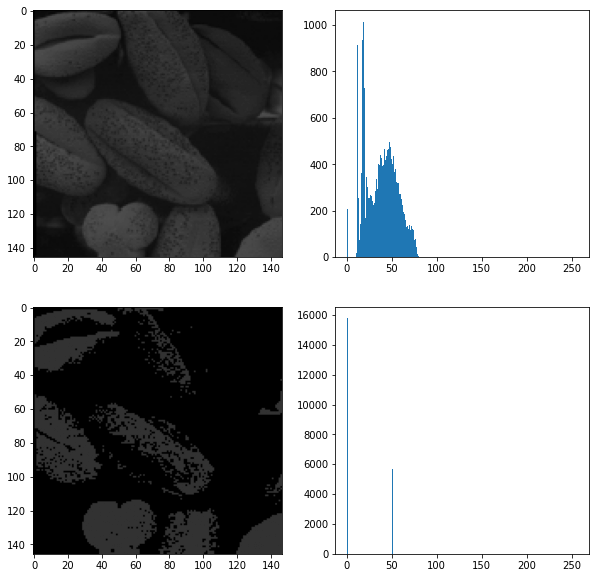

In [ ]:
img = cv2.imread('images/D24_01.jpg', cv2.IMREAD_UNCHANGED)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(img1, cmap='gray',norm=NoNorm())
plt.subplot(222)
plt.hist(img1.ravel(),256,[0,256])

new_img = np.zeros((img1.shape[0],img1.shape[1]),dtype = 'uint8')
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        if img1[i][j] <= 50:
          new_img[i][j] = 0
        elif img1[i][j] >= 150:
          new_img[i][j] = 255
        else:
          new_img[i][j] = 50
plt.subplot(223)
plt.imshow(new_img, cmap='gray',norm=NoNorm())
plt.subplot(224)
plt.hist(new_img.ravel(),256,[0,256])
plt.show()

## Tăng độ sáng của ảnh theo công thức g = f + c

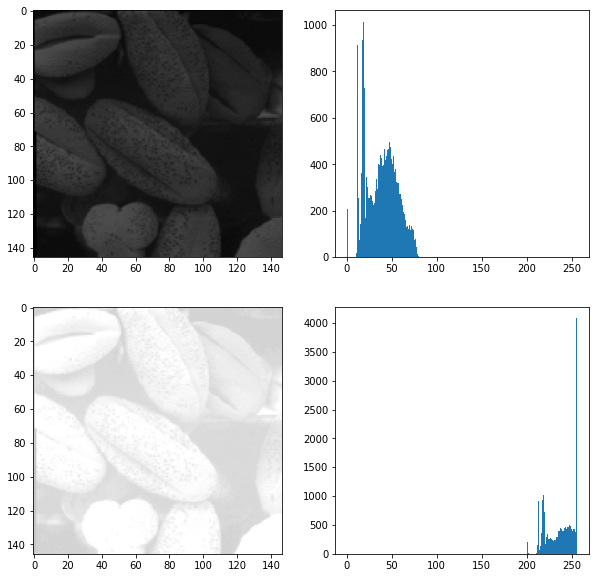

In [ ]:
# Read the image
img = cv2.imread('images/D24_01.jpg', cv2.IMREAD_UNCHANGED)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(img1, cmap='gray',norm=NoNorm())
plt.subplot(222)
plt.hist(img1.ravel(),256,[0,256])
 
# Create zeros array to store the stretched image
new_img = np.zeros((img1.shape[0],img1.shape[1]),dtype = 'uint8')
c=200
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        v=img1[i,j]+c   
        if v>255:
            new_img[i,j] = 255      
        elif v<0:
            new_img[i,j] =0
        else:
            new_img[i,j] =v       

plt.subplot(223)
plt.imshow(new_img, cmap='gray',norm=NoNorm())
plt.subplot(224)
plt.hist(new_img.ravel(),256,[0,256])
plt.show()

## Tăng độ tương phản g = 255*(f-f.min())/(f.max()-f.min())
Trong trường hợp nào thì giải thuật này không hiệu quả?

min:  0
max:  185


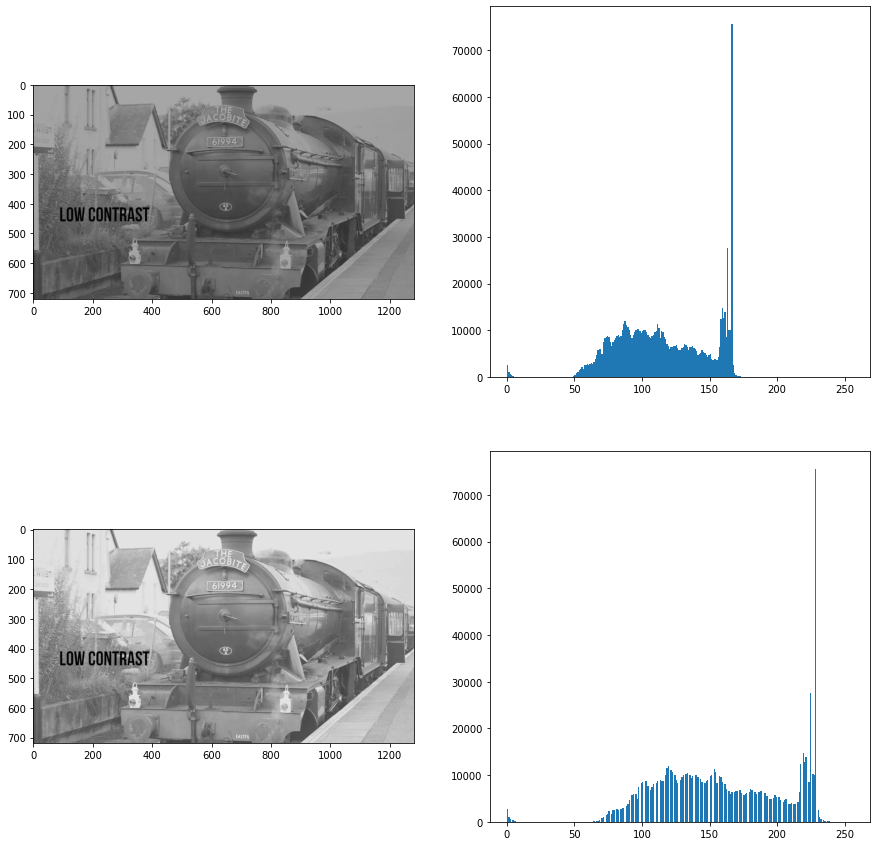

In [ ]:
# Read the image
img = cv2.imread('images/low_contrast.jpg', cv2.IMREAD_UNCHANGED)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.imshow(img1, cmap='gray',norm=NoNorm())

plt.subplot(222)
plt.hist(img1.ravel(),256,[0,256])
 
# Create zeros array to store the stretched image
new_img = np.zeros((img1.shape[0],img1.shape[1]),dtype = 'uint8')
min_v=np.min(img1)
max_v=np.max(img1)
print("min: ",min_v)
print("max: ",max_v)
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):        
        new_img[i,j] = 255*(img1[i,j]-min_v)/(max_v-min_v)        
plt.subplot(223)
plt.imshow(new_img, cmap='gray',norm=NoNorm())
plt.subplot(224)
plt.hist(new_img.ravel(),256,[0,256])
plt.show()

## Tăng độ tương phản trong một dải mức xám 
 g = 0   nếu f<f.low()
 g = 255*(f-f.low())/(f.hight()-f.low())  
 g = 255 nếu f > f.hight()

low value:  60
hight value:  185


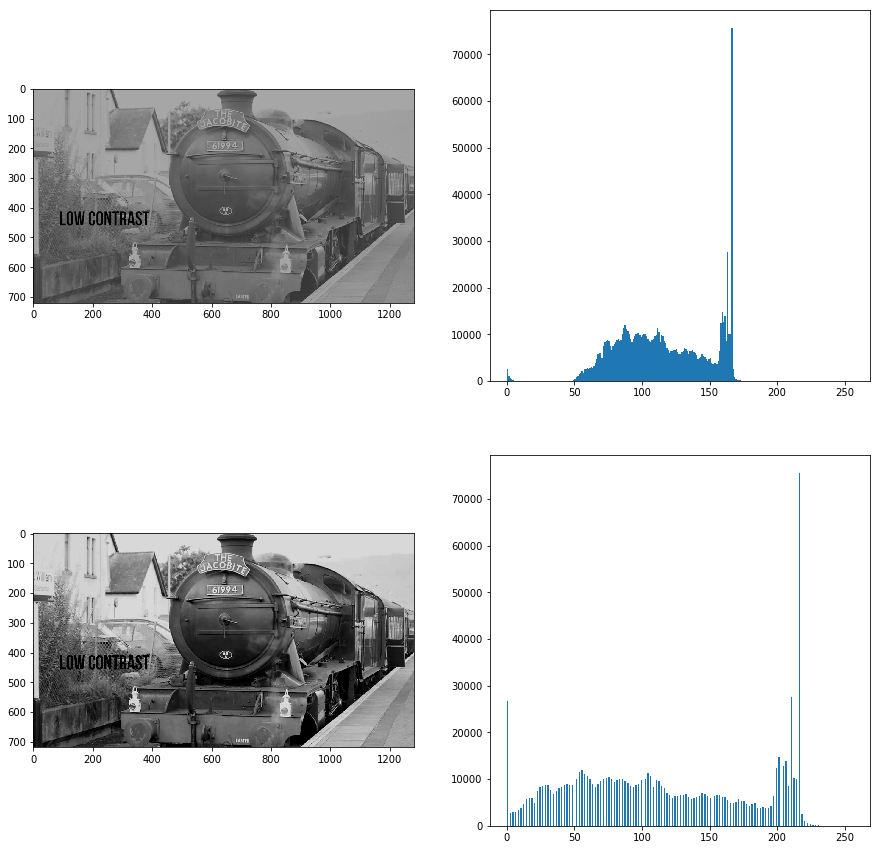

In [ ]:
# Read the image
img = cv2.imread('images/low_contrast.jpg', cv2.IMREAD_UNCHANGED)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.imshow(img1, cmap='gray',norm=NoNorm())

plt.subplot(222)
plt.hist(img1.ravel(),256,[0,256])
 
# Create zeros array to store the stretched image
new_img = np.zeros((img1.shape[0],img1.shape[1]),dtype = 'uint8')
low_v=60 #np.min(img1)
hight_v=np.max(img1)
print("low value: ",low_v)
print("hight value: ",hight_v)
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):        
        if img1[i,j]<low_v:
            new_img[i,j]=0 
        elif img1[i,j]>hight_v:
            new_img[i,j]=255
        else:
            new_img[i,j] = 255*(img1[i,j]-low_v)/(hight_v-low_v)

plt.subplot(223)
plt.imshow(new_img, cmap='gray',norm=NoNorm())
plt.subplot(224)
plt.hist(new_img.ravel(),256,[0,256])
plt.show()

## Cân bằng biểu đồ mức xám (Histogram Equalization)

Thư viện OpenCV cung cấp hàm để Equalize Histogram (tạm gọi là cân bằng biểu đồ mức xám):
- cv2.equalizeHist() - https://docs.opencv.org/3.4.3/d5/daf/tutorial_py_histogram_equalization.html

Dưới đây là ảnh gốc và ảnh sau khi cân bằng

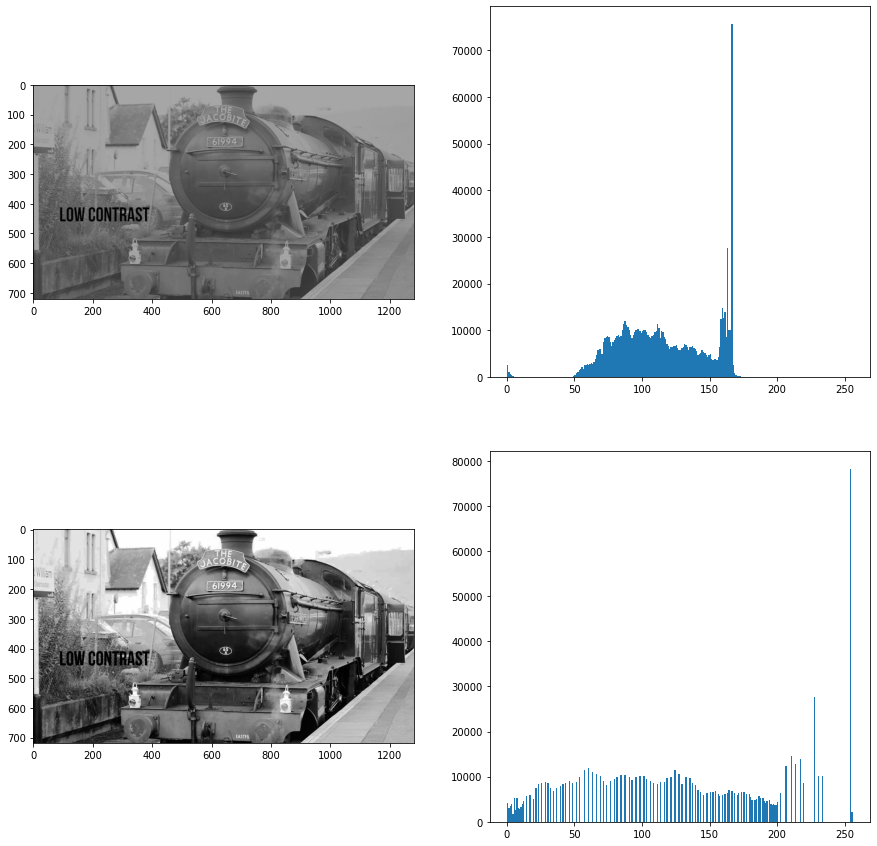

In [ ]:
img = cv2.imread('images/low_contrast.jpg', cv2.IMREAD_UNCHANGED)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15,15))
plt.subplot(221)
plt.imshow(img1, cmap='gray',norm=NoNorm())
plt.subplot(222)
plt.hist(img1.ravel(),256,[0,256])

#img = cv2.imread('images/unequalized.jpg', cv2.IMREAD_GRAYSCALE)
equ = cv2.equalizeHist(img1)
plt.subplot(223)
plt.imshow(equ,cmap='gray',norm=NoNorm())
plt.subplot(224)
plt.hist(equ.ravel(),256,[0,256])
plt.show()

Tuy nhiên, không phải trường hợp nào giải thuật cân bằng biểu đồ mức xám cũng đem lại hiệu quả mong muốn
Trường hợp sau, ảnh cân bằng quá sáng

TypeError: ignored

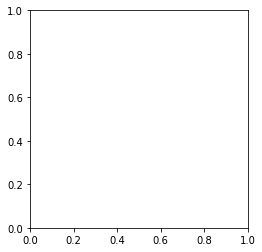

In [ ]:
img = cv2.imread('images/statue_bright.jpg', 0)
plt.imshow(img, cmap = 'gray', norm=NoNorm())
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

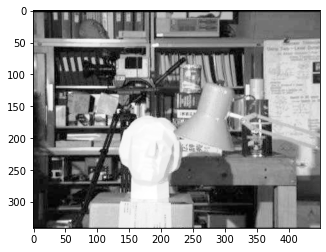

In [ ]:
img = cv2.imread('images/statue_bright.jpg', cv2.IMREAD_GRAYSCALE)
equ = cv2.equalizeHist(img)
plt.imshow(equ, cmap='gray', norm=NoNorm()) # Ảnh kết quả bị quá sáng

### CLAHE (Contrast Limited Adaptive Histogram Equalization)

Để giải quyết trường hợp này, ta cần dùng một phương pháp Histogram Equalization đặc biệt. Ảnh sẽ được chia thành các khối viên gạch "tiles" nhỏ (tileSize default của OpenCV là 8x8). Sau đó mỗi khối này được Equalize Histogram riêng. Nhờ đó histogram sẽ chỉ giới hạn trong một vùng nhỏ. 

Thư viện OpenCV cung cấp hàm:
- cv2.createCLAHE() - https://docs.opencv.org/3.3.0/d7/dbd/group__imgproc.html#gad689d2607b7b3889453804f414ab1018

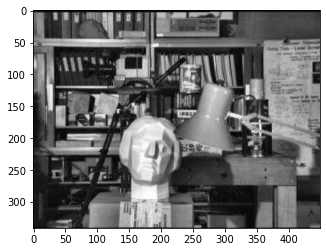

In [ ]:
img = cv2.imread('images/statue_bright.jpg', cv2.IMREAD_GRAYSCALE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img1 = clahe.apply(img)
plt.imshow(img1, cmap='gray', norm=NoNorm()) # Ảnh kết quả bị quá sáng